In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import numpy as np

In [67]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [4]:
url = "https://www.pro-football-reference.com/years/2016/draft.htm"
page = requests.get(url)
html = page.text

In [5]:
soup = BeautifulSoup(html, 'html.parser')

In [7]:
table = soup.find("table")

In [10]:
df = pd.read_html(str(table))[0]
df.columns = df.columns.droplevel()

In [11]:
df.head()

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,...,Yds,TD,Rec,Yds,TD,Solo,Int,Sk,College/Univ,Unnamed: 28_level_1
0,1,1,LAR,Jared Goff,QB,21,2022,0,2,5,...,431,10,1,5,0,2,NaN,NaN,California,College Stats
1,1,2,PHI,Carson Wentz,QB,23,2022,0,1,6,...,1355,9,2,11,0,1,NaN,NaN,North Dakota St.,College Stats
2,1,3,SDG,Joey Bosa,DE,21,2022,0,4,6,...,0,0,0,0,0,218,NaN,59.5,Ohio St.,College Stats
3,1,4,DAL,Ezekiel Elliott,RB,21,2022,1,3,6,...,7829,60,294,2276,12,1,NaN,NaN,Ohio St.,College Stats
4,1,5,JAX,Jalen Ramsey,CB,21,2022,3,5,6,...,0,0,0,0,0,335,16,2.0,Florida St.,College Stats


In [21]:
# Creating a function that will pull the data from each draft class
def scrape_draft(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    table = soup.find('table')
    df = pd.read_html(str(table))[0]
    df.columns = df.columns.droplevel()
    return df

In [26]:
years = list(range(1987,2017))

In [33]:
dfs = []
for year in years:
    url = "https://www.pro-football-reference.com/years/" + str(year) + "/draft.htm"
    df = scrape_draft(url)
    dfs.append(df)
    time.sleep(random.randint(2,13))
    print(str(year) + " complete!")

1987 complete!
1988 complete!
1989 complete!
1990 complete!
1991 complete!
1992 complete!
1993 complete!
1994 complete!
1995 complete!
1996 complete!
1997 complete!
1998 complete!
1999 complete!
2000 complete!
2001 complete!
2002 complete!
2003 complete!
2004 complete!
2005 complete!
2006 complete!
2007 complete!
2008 complete!
2009 complete!
2010 complete!
2011 complete!
2012 complete!
2013 complete!
2014 complete!
2015 complete!
2016 complete!


In [68]:
dfs[15].head()

,Rnd,Pick,Tm,Player,Pos,Age,To,AP1,PB,St,wAV,DrAV,G,Cmp,Att,Yds,TD,Int,Att,Yds,TD,Rec,Yds,TD,Solo,Int,Sk,College/Univ,Unnamed: 28_level_1
0,1,1,HOU,David Carr,QB,23,2012,0,0,5,45,42,94,1353,2267,14452,65,71,305,1328,9,0,0,0,NaN,NaN,NaN,Fresno St.,College Stats
1,1,2,CAR,Julius Peppers,DE,22,2018,3,9,16,130,75,266,0,0,0,0,0,0,0,0,0,0,0,557,11,159.5,North Carolina,College Stats
2,1,3,DET,Joey Harrington,QB,23,2007,0,0,6,31,23,81,1424,2538,14693,79,85,142,402,0,3,8,0,NaN,NaN,NaN,Oregon,College Stats
3,1,4,BUF,Mike Williams,T,22,2009,0,0,4,24,21,59,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,Texas,College Stats
4,1,5,SDG,Quentin Jammer,DB,23,2013,0,0,10,52,51,183,0,0,0,0,0,0,0,0,0,0,0,631,21,NaN,Texas,College Stats


In [69]:
av_dfs = []
for df in dfs:
    av_df = df[['Rnd','Pick','Tm','Player','Pos','Age','wAV','DrAV','College/Univ']].copy()
    av_dfs.append(av_df)

In [71]:
master_df = av_dfs[0]
for df in av_dfs[1:]:
    master_df = master_df.append(df)
master_df.reset_index(inplace=True, drop=True)
master_df.shape

(8230, 9)

In [72]:
master_df.head()

,Rnd,Pick,Tm,Player,Pos,Age,wAV,DrAV,College/Univ
0,1,1,TAM,Vinny Testaverde,QB,23,97,26,Miami (FL)
1,1,2,IND,Cornelius Bennett,LB,22,91,8,Alabama
2,1,3,HOU,Alonzo Highsmith,RB,22,12,12,Miami (FL)
3,1,4,GNB,Brent Fullwood,RB,23,14,14,Auburn
4,1,5,CLE,Mike Junkin,LB,22,3,3,Duke


In [73]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rnd           8230 non-null   object
 1   Pick          8230 non-null   object
 2   Tm            8230 non-null   object
 3   Player        8230 non-null   object
 4   Pos           8230 non-null   object
 5   Age           7159 non-null   object
 6   wAV           6975 non-null   object
 7   DrAV          6294 non-null   object
 8   College/Univ  8213 non-null   object
dtypes: object(9)
memory usage: 578.8+ KB


In [86]:
master_df = master_df[master_df['wAV'] != 'wAV'].copy()

In [87]:
master_df['wAV'] = master_df['wAV'].fillna(0).astype('int')
master_df['DrAV'] = master_df['DrAV'].fillna(0).astype('int')

In [104]:
master_df['Pick'] = master_df['Pick'].astype('int')

In [105]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8019 entries, 0 to 8229
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rnd           8019 non-null   object
 1   Pick          8019 non-null   int64 
 2   Tm            8019 non-null   object
 3   Player        8019 non-null   object
 4   Pos           8019 non-null   object
 5   Age           6948 non-null   object
 6   wAV           8019 non-null   int64 
 7   DrAV          8019 non-null   int64 
 8   College/Univ  8002 non-null   object
dtypes: int64(3), object(6)
memory usage: 626.5+ KB


In [106]:
pick_df = master_df.groupby('Pick')

<AxesSubplot:xlabel='Pick'>

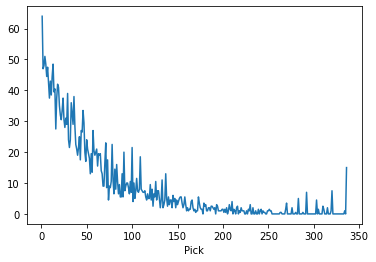

In [110]:
pick_df['wAV'].median().plot(kind='line')

In [117]:
pick_df['wAV'].count().sort_values().head(99)

Pick
336     1
335     3
334     4
333     5
332     5
331     6
294     6
293     6
290     6
289     6
288     6
287     6
286     6
285     6
284     6
283     6
282     6
281     6
280     6
279     6
278     6
277     6
263     6
264     6
265     6
266     6
267     6
268     6
295     6
269     6
271     6
272     6
273     6
274     6
275     6
276     6
270     6
296     6
291     6
298     6
317     6
318     6
297     6
320     6
321     6
322     6
316     6
323     6
325     6
326     6
327     6
328     6
329     6
330     6
324     6
315     6
319     6
313     6
299     6
300     6
314     6
302     6
303     6
304     6
305     6
301     6
307     6
306     6
312     6
311     6
292     6
309     6
308     6
310     6
262     7
261     8
259     8
258     8
257     8
260     8
256    11
255    16
254    20
253    23
250    24
251    24
252    24
247    25
249    25
248    25
246    26
245    26
244    26
243    26
242    26
241    27
225    28
226    28
227    28
Name:

In [118]:
master_df = master_df[master_df['Pick']<=250]

In [144]:
pick_val = master_df.groupby('Pick')['wAV'].median().sort_index(ascending=False)

<AxesSubplot:xlabel='Pick'>

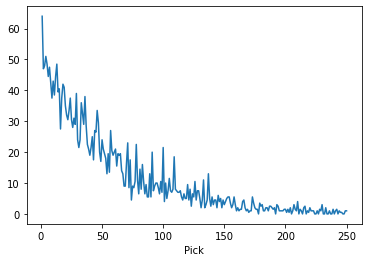

In [145]:
pick_val.plot(kind='line')

<AxesSubplot:xlabel='Pick'>

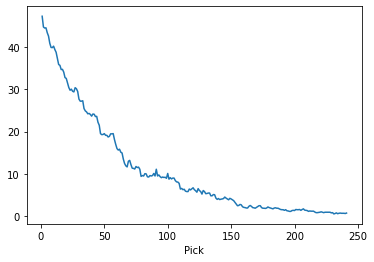

In [158]:
rolling_val = pick_val.rolling(10).mean()
rolling_val.plot(kind='line')

In [159]:
rolling_val = rolling_val.to_frame().reset_index()
rolling_val.head()

,Pick,wAV
0,250,NaN
1,249,NaN
2,248,NaN
3,247,NaN
4,246,NaN


In [151]:
pick_value = pd.read_excel("Pick Value.xlsx")
pick_value.head()

,Pick,Value
0,1,3000.0
1,2,2600.0
2,3,2200.0
3,4,1800.0
4,5,1700.0


In [167]:
combined_df = rolling_val.merge(pick_value, on="Pick").sort_values("Pick").set_index("Pick", drop=True)
combined_df.head()

,wAV,Value
Pick,,
1,47.35,3000.0
2,44.80,2600.0
3,44.55,2200.0
4,44.60,1800.0
5,43.45,1700.0


In [168]:
normalized_df = (combined_df-combined_df.mean())/combined_df.std()

<AxesSubplot:xlabel='Pick'>

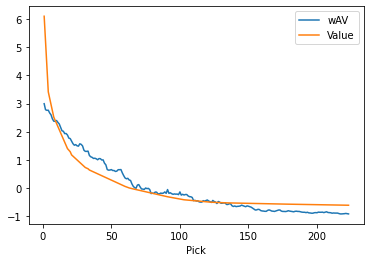

In [169]:
normalized_df.plot(kind='line')

In [170]:
import matplotlib.pyplot as plt

In [174]:
x = normalized_df.index
actual_value = normalized_df['wAV']
projected_value = normalized_df['Value']

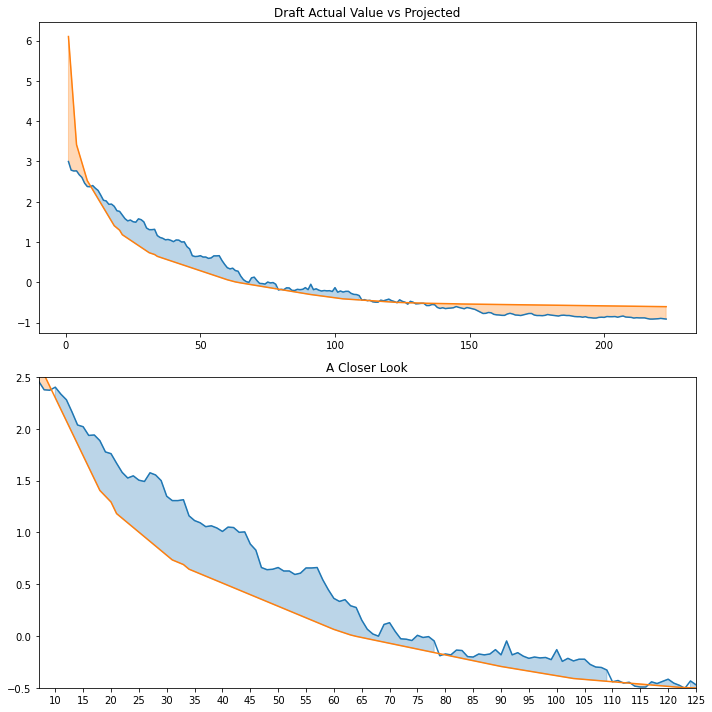

In [185]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10))

ax1.set_title('Draft Actual Value vs Projected')
ax1.plot(x, actual_value)
ax1.plot(x, projected_value)
ax1.fill_between(x, actual_value, projected_value, where=(actual_value > projected_value), color='C0', alpha=0.3)
ax1.fill_between(x, actual_value, projected_value, where=(actual_value < projected_value), color='C1', alpha=0.3)

ax2.set_title('A Closer Look')
ax2.plot(x, actual_value)
ax2.plot(x, projected_value)
ax2.fill_between(x, actual_value, projected_value, where=(actual_value > projected_value), color='C0', alpha=0.3)
ax2.fill_between(x, actual_value, projected_value, where=(actual_value < projected_value), color='C1', alpha=0.3)
ax2.set_xlim([7,125])
ax2.set_ylim([-.5,2.5])
ax2.set_xticks(list(range(10,130,5)))

fig.tight_layout()
plt.show()